# Test out how Cartopy works relative to Basemap to consider switching

In [13]:
import cartopy.crs as ccrs
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import numpy as np

%matplotlib inline

In [38]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])
bathy = np.array(mesh.variables['hdept'])

In [41]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

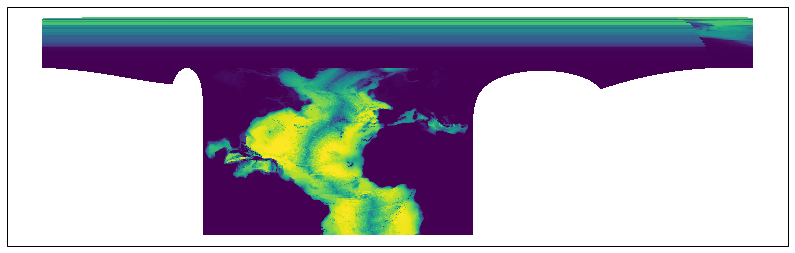

In [44]:
fig = plt.figure(figsize=(14,10))

ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))#, central_latitude=75))EquidistantConic
# ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='#8b7765'))

ax.pcolormesh(lon,lat,bathy[0,:,:],transform=ccrs.NorthPolarStereo(central_longitude=-100))
#ax.contourf(lon, lat, land_mask[0,:,:], \
#            vmax=0.3, cmap=cmocean.cm.deep,\
#            transform=ccrs.NorthPolarStereo(central_longitude=-100))

# ax.set_extent([-130, -30, 60, 90])